# 小作业二： 扩展式博弈、贝叶斯博弈与重复博弈

同学们在4-6周课上已经学习了扩展式博弈、贝叶斯博弈与重复博弈。在这次作业中，你们将会回顾之前的知识，并用python来加深对这些博弈的理解。

## 目录

本次作业主要分为以下几个部分：
- 扩展式博弈
    - 纳什均衡计算
    - 逆向归纳法
- 贝叶斯博弈
    - 收益矩阵计算
    - 均衡求解
- 重复博弈
    - 环境搭建
    - 经典策略实现
    - 折现因子$\delta$的影响

## 提交说明：
请同学们在canvas上提交，本次作业满分100分，占总成绩15%。

**注意，请同学们在提交的版本中不要添加和删改notebook中的函数名，我们会根据这些实现的函数来进行评分。如有其他问题，请联系助教。**

提交文件名设置为 `{姓名}_{学号}_hw2.ipynb`，如`小明_123_hw2.ipynb`.


## 扩展式博弈


## 练习一（30分）


1. （15分）在一个简化的poker游戏中，有两名玩家Alice和Bob，牌堆由Ace和King两种类型的牌组成且比例相同。假设他们初始下注都为1。首先，Alice从牌堆抓一张牌(这张牌Alice能看到但Bob不能看到，Bob只知道Alice摸到Ace牌和摸到King牌的概率均为1/2)，然后Alice根据自己摸到的牌决定是加注(+1)还是弃牌(Bob获胜，收益为(-1,1))。如果Alice决定加注，接下来Bob决定是加注(+1)还是弃牌(Alice获胜，收益为(1,-1))。如果Bob决定加注，那么Alice必须展示她抓的牌，如果牌为Ace那么Alice获胜并得到Bob下的注(收益为(2,-2))，反之如果牌为King则Bob获胜并得到Alice下的注(收益为(-2,2))。请用上课讲过的知识计算出上述博弈的纳什均衡策略(P)及对应的收益(R)，并给出Alice选择加注时Bob认为Alice手牌为Ace的belief。

Notes：可以参考一下poker的游戏规则。如果Alice摸到King牌，她也不一定要弃牌，因为Bob不知道她是什么牌，只要Bob弃牌那么她依然可以获得胜利。只有当两方都选择加注时，输/赢才会是-2/+2。写策略的时候注意按照[p, 1-p]，p为加注概率来写。

请根据问题，把填写以下答案，$P_A$为Alice在纳什均衡点的策略(2 $\times$ 2的矩阵，第一行为Alice摸到Ace时的策略，第二行为Alice摸到King时的策略)，$R_A$为Alice在纳什均衡点的收益(一个数值)，$P_B$为Bob在纳什均衡点的策略(1 $\times$ 2的矩阵)，$R_B$为Bob在纳什均衡点的收益。belief为Alice选择加注时Bob认为Alice手牌为Ace的信念(一个概率值)

$P_A = [[1, 0], [\frac{2}{3}, \frac{1}{3}]], R_A = \frac{1}{3}$

$P_B = [[\frac{1}{3}, \frac{2}{3}]], R_B = - \frac{1}{3}$    

$belief = \frac{3}{5}$  


2. （15分）完成以下代码，使用逆向归纳法求解子博弈精炼纳什均衡。

文件"data.txt"使用的是第四周课件第95页的博弈，格式解释如下：
- Node：通过';'进行拆分
    - Node id: 代表是第几号节点
    - T/F：是否为叶子节点
        - 如果是叶子节点(T)，那么后面跟的是两个玩家的收益，用()表示
        - 如果非叶子节点(F)，那么后面跟的是孩子节点的节点序号，用[]表示，最后是一个玩家id表示当前节点是该玩家做决策。
        
注意：我们可能会在测试的时候更改"data.txt"的内容，因此直接print答案是不行的！

In [1]:
players = 0
tree = {}
with open("data.txt") as dataFile:
    players = int(dataFile.readline().split(":")[1].strip())
    dataFile.readline()
    text = dataFile.readline()
    while text != "":
        arr = text.split(';')
        if arr[1] == 'F':
            tree[arr[0]] = {'isLeaf': 'F', 'children': arr[2][1:-1].split(','), 'player': int(arr[3].replace("\n",""))}
        elif arr[1] == 'T':
            tree[arr[0]] = {'isLeaf': 'T', 'payoffs': arr[2].replace("\n","")[1:-1].split(',')}
        text = dataFile.readline()

def induction(node:str):
    ### TODO: write your code here ####
    ### set nash equilibrium path ###
    ### hint: set tree[node]['best'] attribute here
    if 'best' not in tree[node].keys():
        
        if tree[node]['isLeaf'] == 'T':
            tree[node]['best'] = [node, tree[node]['payoffs']]
        else:
            children = tree[node]['children']

            for i in children:
                induction(i)

            payoff_1 = tree[children[0]]['best'][1]
            payoff_2 = tree[children[1]]['best'][1]
            player = tree[node]['player']

            if payoff_1[player] > payoff_2[player]:
                tree[node]['best'] = [children[0], payoff_1]
            else:
                tree[node]['best'] = [children[1], payoff_2]
    else:
        return

    

def bestStrategy():
    msj = f"{'Node':^10}{'Player':^10}{'Best Option':^10}\n"
    node = tree['0']
    current = 0
    while node['isLeaf'] == 'F':
        msj += f"{current:^10}{node['player']:^10}{node['best'][0]:^10}\n"
        current = node['best'][0]
        node = tree[node['best'][0]]
    msj += f"The payoff is {node['best'][1]} in the node {current}"
    return msj

induction('0')
print(bestStrategy())

   Node     Player  Best Option
    0         0         1     
    1         1         3     
    3         0         6     
The payoff is ['3', '2'] in the node 6


## 贝叶斯博弈
通过课程的学习，我们知道了一个完整的贝叶斯博弈需要以下要素：
- 参与人集合$\Gamma=\{1,2,...,n\}$
- 参与人的类型集$T_1,...,T_n$
- 参与人关于其他参与人类型的推断$p_1(t_{-1}|t_1),...,p_n(t_{-n}|t_n)$
- 参与人类型相依的行动集$A(t_1),...,A(t_n)$
- 参与人类型相依的收益函数$u_1(a_1(t_1),a_2(t_2),...,a_n(t_n);t_1),...,u_n(a_1(t_1),a_2(t_2),...,a_n(t_n);t_n)$


在第一节课我们已经学习过了性别之战博弈，在该博弈中我们假设了他们都想共渡一个夜晚而不想分开。然而在实际情况中，该假设不一定总是成立。
考虑以下情况：假设男方(玩家2)不一定愿意和女方(玩家1)共渡夜晚，女方不知道男方是否愿意但可以通过贝叶斯规则推断出男方有$\frac{1}{2}$的概率愿意，有$\frac{1}{2}$的概率不愿意，两种情况对应的收益矩阵分别为$R^y$和$R^n$

$$
\mathbf{R}^y = \left[\begin{matrix}
(2,1) & (0,0) \\
(0,0) & (1,2)
\end{matrix}\right] 
\quad 
\mathbf{R}^n = \left[\begin{matrix}
(2,0) & (0,2) \\
(0,1) & (1,0)
\end{matrix}\right].
$$

### 练习二 （30分）
1.（5分） 请填充以下代码，计算女方(歌剧，歌剧)、(歌剧，拳击)、(拳击，歌剧)、(拳击，拳击)四种纯策略的收益矩阵。


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


########### TODO: fill in the p: Pr(player 2 is type 1) ###########
p = 0.5
########### END TODO ##############################################


# player 1

########### TODO: fill in the payoff matrix of payer 1 ###########
u1 = np.array([[2, 0], [0, 1]])
########### END TODO #############################################

U1 = [u1, u1] # player 1 has same payoffs regardless of 2's type
A1 = ['B1', 'S1']

# player 2

########### TODO: fill in the payoff matrix of payer 2 ###########
u21 = np.array([[1, 0], [0, 2]])
u22 = np.array([[0, 2], [1, 0]])
########### END TODO #############################################


U2 = [u21, u22] # player 2 has different payoffs for two types
a2 = ['B2', 'S2']
A2 = [f'{a[0]}{b[0]}2' for a in a2 for b in a2]

def print_payoffs(U, A):
    '''
        Print payoffs matrix
        INPUTS:
            U: list of 2 payoff matrices for player 1 (row player) and player 1 for certain state
            A: names of actions
        OUTPUTS:
            t1, t2: payoff matrices suitable for finding the NE
            
    '''
    na1,na2 = U[0].shape
    X = [[(U[0][r][c],U[1][r][c]) for c in range(na2)] for r in range(na1)]
    payoff_matrix = pd.DataFrame(X, index=A[0], columns=A[1])
    return payoff_matrix

print(f'--- If P2 is type 1 ---')
print(print_payoffs([u1, u21], [A1, a2]))

print(f'--- If P2 is type 2 ---')
print(print_payoffs([u1, u22], [A1, a2]))

--- If P2 is type 1 ---
        B2      S2
B1  (2, 1)  (0, 0)
S1  (0, 0)  (1, 2)
--- If P2 is type 2 ---
        B2      S2
B1  (2, 0)  (0, 2)
S1  (0, 1)  (1, 0)


In [3]:
def expected_payoffs_BoS(U1, U2, p, player=1):
    ### TODO: finish this function to get expected payoff
    # INPUTS:
    #     U1: list of 2 payoff matrices for player 1 (row player)
    #     U2: list of 2 payoff matrices for player 2 (column player)
    #     p: (scalar) Probability that player 2 is the type 1
    #     player: (intager) indicator of player, if player=1 the function return best response of player 1
    # OUTPUTS:
    #     t1, t2: payoff matrices suitable for finding the NE
    #     A1, A2: names of actions
    if player == 1:
        U = U1
    else:
        U = U2
    
    payoff_1 = np.repeat(U[0], 2, axis=1)
    payoff_2 = np.concatenate((U[1], U[1]), axis=1)
    expected_payoff = payoff_1 * p + payoff_2 * (1-p)
    
    return expected_payoff

# row player: player 1, column player: player 2, 

print(f'--- the expected payoffs matrix of player 1 ---')
X1 = expected_payoffs_BoS(U1, U2, p, 1)
print(pd.DataFrame(X1, columns=A2, index=A1))
print(f'--- the expected payoffs matrix of player 2 ---') 
X2 = expected_payoffs_BoS(U1, U2, p, 2)
print(pd.DataFrame(X2, columns=A2, index=A1))

--- the expected payoffs matrix of player 1 ---
    BB2  BS2  SB2  SS2
B1  2.0  1.0  1.0  0.0
S1  0.0  0.5  0.5  1.0
--- the expected payoffs matrix of player 2 ---
    BB2  BS2  SB2  SS2
B1  0.5  1.5  0.0  1.0
S1  0.5  0.0  1.5  1.0


2. （10分）假设男女双方都不一定愿意和对方共渡夜晚，女方通过贝叶斯规则推断出男方有$\frac{1}{2}$的概率愿意，$\frac{1}{2}$的概率不愿意；男方通过贝叶斯规则推断出女方有$\frac{2}{3}$的概率愿意，$\frac{1}{3}$的概率不愿意，请参考1中例子给出对应的收益矩阵，完成以下代码。


In [4]:
import pandas as pd
import numpy as np

# p1: Pr(player 1 think player 2 is type y) p2: Pr(player 2 think player 1 is type y)
p1 = 0.5 
p2 = 2./3 

# player 1

########### TODO: fill in the payoff matrix of payer 1 ###########
u11 = np.array([[2, 0], [0, 1]])
u12 = np.array([[0, 2], [1, 0]])
########### END TODO #############################################

U1 = [u11, u12] # player 2 has different payoffs for two types
a1 = ['B1', 'S1']
A1 = [f'{a[0]}{b[0]}1' for a in a1 for b in a1]

# player 2

########### TODO: fill in the payoff matrix of payer 2 ###########
u21 = np.array([[1, 0], [0, 2]])
u22 = np.array([[0, 2], [1, 0]])
########### END TODO #############################################

U2 = [u21, u22] # player 2 has different payoffs for two types
a2 = ['B2', 'S2']
A2 = [f'{a[0]}{b[0]}2' for a in a2 for b in a2]


print(f'--- each player wants to go out with the other ---')
print(print_payoffs([u11, u21], [a1, a2]))

print(f'--- player 1 wants to go out with player 2, but player 2 wants to avoid player 1 ---')
print(print_payoffs([u11, u22], [a1, a2]))

print(f'--- player 1 wants to avoid player 2, but player 2 wants to go out with player 1 ---')
print(print_payoffs([u12, u21], [a1, a2]))

print(f'--- each player wants to avoid the other ---')
print(print_payoffs([u12, u22], [a1, a2]))

--- each player wants to go out with the other ---
        B2      S2
B1  (2, 1)  (0, 0)
S1  (0, 0)  (1, 2)
--- player 1 wants to go out with player 2, but player 2 wants to avoid player 1 ---
        B2      S2
B1  (2, 0)  (0, 2)
S1  (0, 1)  (1, 0)
--- player 1 wants to avoid player 2, but player 2 wants to go out with player 1 ---
        B2      S2
B1  (0, 1)  (2, 0)
S1  (1, 0)  (0, 2)
--- each player wants to avoid the other ---
        B2      S2
B1  (0, 0)  (2, 2)
S1  (1, 1)  (0, 0)


In [5]:
def expected_payoffs_BoS(U1, U2, p, player=1, player_type=1):
    ################## TODO: calculate expected payoff #########
    ###### INPUTS:
    ######     U1: list of 2 payoff matrices for player 1 (row player)
    ######     U2: list of 2 payoff matrices for player 2 (column player)
    ######     p: (scalar) Probability of player
    ######     player: (intager) indicator of player, if player=0 the function return best response of player 1
    ######     type: (intager) indicator of type, if type=1 denote type n else type=0 denote type y
    ###### OUTPUTS:
    ######     t1, t2: payoff matrices suitable for finding the NE
    ######     A1, A2: names of actions
    if player == 1:
        U = U1[player_type]
    else:
        U = U2[player_type].T
    
    payoff_1 = np.repeat(U, 2, axis=1)
    payoff_2 = np.concatenate((U, U), axis=1)
    expected_payoff = payoff_1 * p + payoff_2 * (1-p)
                
    return expected_payoff
    #####################################################################################


print(f'--- the expected payoffs matrix of player 1 type n ---')
X = expected_payoffs_BoS(U1, U2, p1, 1, 1)
print(pd.DataFrame(X, columns=A2, index=a1))

print(f'--- the expected payoffs matrix of player 1 type y ---')
X = expected_payoffs_BoS(U1, U2, p1, 1, 0)
print(pd.DataFrame(X, columns=A2, index=a1))

print(f'--- the expected payoffs matrix of player 2 type n ---')
X = expected_payoffs_BoS(U1, U2, p2, 2, 1)
print(pd.DataFrame(X, columns=A1, index=a2))

print(f'--- the expected payoffs matrix of player 2 type y ---')
X = expected_payoffs_BoS(U1, U2, p2, 2, 0)
print(pd.DataFrame(X, columns=A1, index=a2))

--- the expected payoffs matrix of player 1 type n ---
    BB2  BS2  SB2  SS2
B1  0.0  1.0  1.0  2.0
S1  1.0  0.5  0.5  0.0
--- the expected payoffs matrix of player 1 type y ---
    BB2  BS2  SB2  SS2
B1  2.0  1.0  1.0  0.0
S1  0.0  0.5  0.5  1.0
--- the expected payoffs matrix of player 2 type n ---
    BB1       BS1       SB1  SS1
B2  0.0  0.333333  0.666667  1.0
S2  2.0  1.333333  0.666667  0.0
--- the expected payoffs matrix of player 2 type y ---
    BB1       BS1       SB1  SS1
B2  1.0  0.666667  0.333333  0.0
S2  0.0  0.666667  1.333333  2.0


3. （15分）求解第一问(5')和第二问(10')中博弈的**纯策略贝叶斯纳什均衡**，参考提示（3）的格式将纳什均衡点时的双方纯策略写在下面，如果有多个请全部写出。

提示：（1）第一问和第二问的关系有点像“简化的斗鸡博弈”和“斗鸡博弈”之间的关系，需合理利用信念！

（2）在静态贝叶斯博弈中策略组合$s^* = (s_1^*,...,s_n^*)$是一个纯策略贝叶斯纳什均衡，如果对$\forall i \in T$及$\forall t_i \in T_i, s_i^*(t_i)$，满足

$s_{i}^{*}\left(t_{i}\right) \in \arg \max _{a_{i}\left(t_{i}\right) \in A_{i}\left(t_{i}\right)} \sum_{t_{-i} \in T_{-i}} u_{i}\left(s_{1}^{*}\left(t_{1}\right), \cdots, s_{i-1}^{*}\left(t_{i-1}\right), a_{i}\left(t_{i}\right), s_{i+1}^{*}\left(t_{i+1}\right), \cdots, s_{n}^{*}\left(t_{n}\right) ; t_{i}\right) p_{i}\left(t_{-i} \mid t_{i}\right)$

（3）第一问策略类型的格式应为（女方策略，（男方愿意时的策略，男方不愿意时的策略）），第三问策略的格式应为（（女方愿意时策略，女方不愿意时策略），（男方愿意时策略，男方不愿意时策略））

第一问的纳什均衡是: 

第三问的纳什均衡是:

## 重复博弈

假设两名在进行重复囚徒困境博弈，每个阶段博弈中玩家的收益矩阵为
$$
\mathbf{R}^1 = \left[\begin{matrix}
2 & 0 \\
3 & 1
\end{matrix}\right] 
\quad 
\mathbf{R}^2 = \left[\begin{matrix}
2 & 3 \\
0 & 1
\end{matrix}\right].
$$
其中第0行/列的动作为抵赖，第1行/列的动作为招供。\
此重复博弈的每个阶段博弈只有一个纳什均衡点(招供，招供)，在课上我们已经学到：阶段博弈重复有限次，在博弈的每个阶段中，博弈的结果都是阶段博弈的纳什均衡，但在无限重复博弈中情况是不同的。

### 练习三 （40分）
1. （10分）请填充以下代码，搭建重复囚徒困境博弈环境


In [6]:
import numpy as np
class iterated_games():
  def __init__(self, payoff1, payoff2, max_step):
    self.payoff1 = payoff1
    self.payoff2 = payoff2
    self.max_step_num = max_step
    self.reset()
  def reset(self):
    self.history = {'agent1':[], 'agent2':[]}
    self.step_num = 0
    return self.history
  def step(self, a1, a2):
    ### We recommend that the history can be a dictionary, where each element is a list
    ### like self.history['agent1'] = [a11, a12, ...], self.history['agent2']=[a21, a22, ...] defined in the above function
    ### So you can directly return self.history

    ### input: a1 refers to action for agent 1, a2 refers to action for agent 2
    ### TODO: Implement the step function ###
    self.step_num += 1

    if self.step_num >= self.max_step_num:
        done = True
    else:
        done = False

    self.history['agent1'].append(a1)
    self.history['agent2'].append(a2)

    r1 = self.payoff1[a1, a2]
    r2 = self.payoff2[a1, a2]
    ### END TODO ###

    return r1, r2, self.history, done
    # return
    # r1: agent1's reward
    # r2: agent2's reward
    # history: dictionary contains historical information
    # done: if step_num reaches max step number, done=True, else done=False

### Run some simulations to verify the correctness of your algorithm
p1 = np.random.randn(2,2) # two random payoff matrix
p2 = np.random.randn(2,2)
env = iterated_games(p1, p2, 10)
done = False
print(p1)
print(p2)
while True:
  if done:
    break
  a1 = np.random.choice(2)
  a2 = np.random.choice(2)
  r1, r2, history, done = env.step(a1, a2)
  print(a1, a2, r1, r2,history,done)

[[-0.4570005  -0.62343965]
 [ 2.19686866  0.84143707]]
[[ 1.9010398  -0.34157896]
 [-0.11514641 -0.33551574]]
1 0 2.196868662260708 -0.11514641360093379 {'agent1': [1], 'agent2': [0]} False
1 0 2.196868662260708 -0.11514641360093379 {'agent1': [1, 1], 'agent2': [0, 0]} False
1 0 2.196868662260708 -0.11514641360093379 {'agent1': [1, 1, 1], 'agent2': [0, 0, 0]} False
1 0 2.196868662260708 -0.11514641360093379 {'agent1': [1, 1, 1, 1], 'agent2': [0, 0, 0, 0]} False
1 1 0.8414370663572691 -0.33551574358102354 {'agent1': [1, 1, 1, 1, 1], 'agent2': [0, 0, 0, 0, 1]} False
0 1 -0.6234396508688526 -0.3415789561576477 {'agent1': [1, 1, 1, 1, 1, 0], 'agent2': [0, 0, 0, 0, 1, 1]} False
0 1 -0.6234396508688526 -0.3415789561576477 {'agent1': [1, 1, 1, 1, 1, 0, 0], 'agent2': [0, 0, 0, 0, 1, 1, 1]} False
0 1 -0.6234396508688526 -0.3415789561576477 {'agent1': [1, 1, 1, 1, 1, 0, 0, 0], 'agent2': [0, 0, 0, 0, 1, 1, 1, 1]} False
1 1 0.8414370663572691 -0.33551574358102354 {'agent1': [1, 1, 1, 1, 1, 0, 0, 0

2. （15分）参考随机策略(random_agent)的写法，在搭建的博弈环境中实现以下三种策略：
- 触发策略(grim_trigger_agent): 选择抵赖，但如果对手选择招供，那么接下来每次阶段博弈都选择招供。
- 有限惩罚策略(limited_punish_agent)：与触发策略类似，选择抵赖，如果对手选择招供，那么接下来K次博弈都会选择招供(K+1次博弈时会选择抵赖)
- 一报还一报策略(tit_for_tat_agent)：总以合作开局，但从此以后就采取以其人之道还治其人之身的策略。

In [7]:
### We define the idx for identifying agent because the step function gets the history for both agents
### Or you can implement agent in your own ways
### Note that you need to handle corner case when the length of history is 0

### All agent get input of history dictionary, output the action

class random_agent:
  def __init__(self, idx=0):
    self.idx = idx ### idx for identifying which agent
  def step(self, history_both):
    action = np.random.choice(2)  
    return action

class grim_trigger_agent:
  def __init__(self, idx=0):
    self.idx = idx
  def step(self, history_both):
    ### TODO: Implement grim trigger agent ###
    if self.idx == 0:
        history = history_both['agent2']
    else:
        history = history_both['agent1']
    
    if 1 in history:
        action = 1
    else:
        action = 0
    ### END TODO ###
    return action

class limited_punish_agent:
  def __init__(self, k=3, idx=0):
    self.k = k # punishment step
    self.idx = idx
    ### TODO: Add the variables/functions if you need  ###
    self.step_num = 0
    ### END TODO  ###
  def step(self, history_both):
    ### TODO: Implement limited punishment agent ###
    ### Note you may need to handle many corner cases:
    ### when the agent reverts back to cooperation: have to take cooperation no matter how the other player behaved
    ### when the agent is inside the k punishment step
    ### when the agent begin to punish
    if self.idx == 0:
        history = history_both['agent2']
    else:
        history = history_both['agent1']
    
    if history[-1] == 1 and len(history) > 0:
        action = 1
        self.step_num = self.k
    elif self.step_num > 0:
        action = 1
        self.step_num -= 1
    else:
        action = 0
    ### END TODO  ###
    return action

class tit_for_tat_agent:
  def __init__(self, idx=0):
    self.idx = idx
  def step(self, history_both):
    ### TODO: Implement tit for tat ###
    if self.idx == 0:
        history = history_both['agent2']
    else:
        history = history_both['agent1']

    if len(history) == 0:
        action = 0
    else:
        action = history[-1]    
    ### END TODO  ###
    return action



### Run some simulations to verify the correctness of your algorithm
### Random Agent
history = {'agent1': [1, 0, 0], 'agent2': [1, 0, 1]}
agent = random_agent(idx=0)
print('Test random agent')
for _ in range(5):
  print(agent.step(history))

### grim_trigger_agent for testing 2 cases
history = {'agent1': [1, 0, 0], 'agent2': [0, 0, 0]}
agent = grim_trigger_agent(idx=0)
print('Test grim_trigger_agent, case 1')
print('it should be', 0, agent.step(history))

history = {'agent1': [1, 0, 0], 'agent2': [0, 1, 0]}
print('Test grim_trigger_agent, case 2')
print('it should be', 1, agent.step(history))

### limited_punish_agent for testing
### You might define some flag variables in the implementation of limited_punish_agent
### So here it might be hard to directly test the correctness
### You might need to firstly implement the evaluation function in the next section 
### Then use that to verify the correctness


### tit_for_tat_agent for testing 2 cases
history = {'agent1': [1, 0, 0], 'agent2': [0, 1, 0]}
agent = tit_for_tat_agent(idx=0)
print('Test tit_for_tat_agent, case 1')
print('it should be', 0, agent.step(history))

history = {'agent1': [1, 0, 0], 'agent2': [0, 1, 1]}
print('Test tit_for_tat_agent, case 2')
print('it should be', 1, agent.step(history))


Test random agent
0
0
0
1
0
Test grim_trigger_agent, case 1
it should be 0 0
Test grim_trigger_agent, case 2
it should be 1 1
Test tit_for_tat_agent, case 1
it should be 0 0
Test tit_for_tat_agent, case 2
it should be 1 1


3. （15分）在不同的折现因子$\delta$情况下，各策略的表现可能不同。在对手采用一报还一报策略的情况下，完善以下代码，画出各策略的相对收益曲线图。

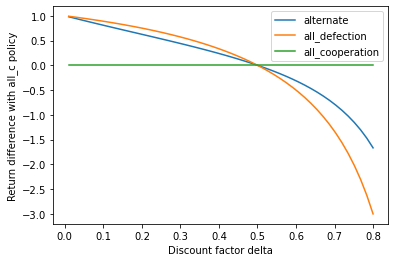

In [8]:
import numpy as np
def get_discount_return(return_list, delta):
    ### TODO: Implement discount return calculation ###
    return_all = 0

    for i in reversed(return_list):
        return_all = i + delta * return_all
    ### END TODO  ###
    return return_all

def evaluate(env, agent1, agent2, delta):
    history = env.reset()
    done = False
    r1_list = []
    r2_list = []
    while True:
        if done:
            break
        ### TODO: Implement rollouts ### 
        ### First take actions for both agent given the history
        ### Then take env rollout by env.step based on these two actions
        ### Finally, store the reward in r1_list, r2_list
        a1 = agent1.step(history)
        a2 = agent2.step(history)
        r1, r2, history, done = env.step(a1, a2)
        r1_list.append(r1)
        r2_list.append(r2)
        ### END TODO  ###
    return1 = get_discount_return(r1_list, delta) # Discounted return for the first policy
    return2 = get_discount_return(r2_list, delta) # Discounted return for the second policy
    return return1, return2

payoff1 = np.array([[2,0],[3,1]])
payoff2 = np.array([[2,3],[0,1]])
max_step = 100
env = iterated_games(payoff1, payoff2, max_step)
delta_list = np.linspace(0.01, 0.8, 50)
reward_alternate = []
reward_all_d = []
reward_all_c = []

class alternate:
    def __init__(self, idx):
        self.idx = idx
        self.step_num = 0
    def step(self, history_both):
        if self.step_num % 2 == 0:
            action = 1
        else:
            action = 0
        self.step_num += 1
        return action

class all_c:
    def __init__(self, idx):
        self.idx = idx
    def step(self, history_both):
        action = 0
        return action

class all_d:
    def __init__(self, idx):
        self.idx = idx
    def step(self, history_both):
        action = 1
        return action

for delta in delta_list:
    ## TODO: Implement the agent ##
    ## Compare the performance between (tit_for_tat_agent, alternate), (tit_for_tat_agent, all_d), (tit_for_tat_agent, all_c)
    ## (tit_for_tat_agent, grim_trigger_agent), (tit_for_tat_agent, limited_punish_agent), (tit_for_tat_agent, tit_for_tat_agent)
    agent_tit_for_tat = tit_for_tat_agent(idx=0)
    agent_alternate = alternate(idx=1)
    agent_all_d = all_d(idx=1)
    agent_all_c = all_c(idx=1)
    r1, r2 = evaluate(env, agent_tit_for_tat, agent_alternate, delta)
    r1_1, r2_1 = evaluate(env, agent_tit_for_tat, agent_all_d, delta)
    r1_2, r2_2 = evaluate(env, agent_tit_for_tat, agent_all_c, delta)  
    ## END TODO ###
    reward_alternate.append(r2)
    reward_all_d.append(r2_1)
    reward_all_c.append(r2_2)
  
reward_alternate = np.array(reward_alternate)
reward_all_d = np.array(reward_all_d)
reward_all_c = np.array(reward_all_c)


import matplotlib.pyplot as plt
plt.plot(delta_list, reward_alternate - reward_all_c, label='alternate')
plt.plot(delta_list, reward_all_d - reward_all_c, label='all_defection')
plt.plot(delta_list, reward_all_c - reward_all_c, label='all_cooperation')
plt.legend()
plt.xlabel('Discount factor delta')
plt.ylabel('Return difference with all_c policy')
plt.show()